<a href="https://www.kaggle.com/code/maimunulkjisan/rainfall-prediction-s5e3-optuna-tunning?scriptVersionId=226851633" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## 🧠 Welcome to the *Exploring Rainfall Prediction* Notebook!

> Welcome to our Kaggle notebook for the **Exploring Rainfall Prediction** competition! In this notebook, we aim to explore, analyze, and model data from a **Kaggle Competition** to identify factors associated with Rainfall Prediction. This competition is part of Kaggle's **2025 Playground Series 5 Episode 3**, designed to challenge and enhance our machine learning skills. Let’s dive in and uncover insights from the data!

---



<figure>
  <center>
    <img src='https://c4.wallpaperflare.com/wallpaper/231/640/853/walking-in-rain-painting-wallpaper-preview.jpg' 
         height="50px" width="400px" />
  </center>
</figure>

     
# 🏆 Kaggle Competition S5E3: Weather Rainfall Prediction | Logistic Regression 🌦️

## 📋 Table of Contents



### 1. [🎯 Introduction](#🎯-introduction)  
   - Overview of the competition and goals.

### 2. [📦 Libraries and Setup](#📦-libraries-and-setup)  
   - Required libraries and environment setup.

### 3. [🛠️ Data Loading](#🛠️-data-loading-and-initial-analysis)  
   - Data loading, cleaning, and initial exploration.

### 4. [🔧 Feature Engineering](#🔧-feature-engineering)  
   - Extracting meaningful features for prediction.

### 5. [🚂 Model Training](#🚂-model-training-and-evaluation)  
   - Building and training the machine learning models.

### 6. [🎯 Hyperparameter Tuning](#🎯-hyperparameter-tuning-with-optuna)  
   - Optimizing the model using Optuna.

### 7. [📤 Predictions](#📤-saving-predictions)  
   - Generating and saving the predictions.

### 8. [🎉 Conclusion](#🎉-conclusions-and-next-steps)  
   - Final thoughts and next steps.
   
---



## 🎯 Dataset Description for Weather Prediction | Kaggle Competition Data🎯

| Column Name   | Description                                                                 | Data Type |
|----------------|-----------------------------------------------------------------------------|-----------|
| day            | The day number representing the time of the weather data.                    | Integer   |
| pressure       | The atmospheric pressure at the given time, measured in hPa.                | Float     |
| maxtemp        | The maximum temperature for the day in degrees Celsius.                     | Float     |
| temparature    | The average temperature for the day in degrees Celsius.                     | Float     |
| mintemp        | The minimum temperature for the day in degrees Celsius.                     | Float     |
| dewpoint       | The dewpoint temperature in degrees Celsius, indicating moisture in the air.| Float     |
| humidity       | The humidity level in percentage, indicating the amount of moisture in the air.| Float     |
| cloud          | The percentage of cloud cover for the day.                                  | Float     |
| sunshine       | The number of hours of sunshine during the day.                             | Float     |
| winddirection  | The wind direction, measured in degrees from North (0° to 360°).            | Float     |
| windspeed      | The wind speed in km/h.                                                     | Float     |
| rainfall       | The rainfall amount in millimeters for the day (binary classification: 1 for rain, 0 for no rain).| Integer   |

---

**Competition Goal** 🏁  
Predict rainfall occurrence using meteorological data with machine learning.

**Key Challenge** 🔍  
Class imbalance + temporal patterns + hyperparameter in weather data requiring special handling.

**Evaluation Metric** 📏  
**ROC-AUC Score** - Measures model's ability to distinguish between rainy and non-rainy days.

**Our Arsenal** 💡  
- Advanced feature engineering  
- Time-aware cross-validation  
- Hyperparameter optimization with Optuna  
- Logistic Regression as baseline

---
## For visualising full Architecture you have to open notebook

## 🧩 Full Project Architecture


```mermaid
graph TD
    A[Raw Data] --> B[Data Preparation]
    B --> C[Feature Engineering Galaxy]
    C --> D[Preprocessing Pipeline]
    D --> E[Model Training]
    E --> F[Evaluation]
    F --> G[Kaggle Submission]

    %% Data Preparation
    subgraph B[Data Preparation]
        B1[🔄 Merge Train/Test/Extra]
        B2[📅 DateTime Conversion]
        B3[🧹 Handle Missing Values]
        B4[⚖️ Class Balance Check]
    end

    %% Feature Engineering
    subgraph C[Feature Engineering]
        C1[⏳ Temporal Features]
        C2[🌡️ Thermodynamics]
        C3[📈 Rolling Statistics]
        C4[🧩 Polynomial Interactions]
        C5[🌪️ Wind Vector Decomposition]
    end

    %% Preprocessing
    subgraph D[Preprocessing Pipeline]
        D1[🔧 Median Imputation]
        D2[⚖️ Standard Scaling]
        D3[🎯 Feature Selection]
    end

    %% Model Training
    subgraph E[Model Training]
        E1[🎛️ Optuna Tuning]
        E2[🤖 Logistic Regression]
        E3[⏳ TimeSeriesSplit]
        E4[⚖️ Class Weight Handling]
    end

    %% Evaluation
    subgraph F[Evaluation]
        F1[📊 ROC-AUC Curve]
        F2[🎯 Optimal Threshold]
        F3[🤔 Confusion Matrix]
    end

    %% Submission
    subgraph G[Kaggle Submission]
        G1[🔮 Probability Calibration]
        G2[📤 CSV Export]
    end

    %% Styling
    style A fill:#20B2AA,stroke:#333,stroke-width:2px
    style B fill:#87CEEB,stroke:#333,stroke-width:2px
    style C fill:#98FB98,stroke:#333,stroke-width:2px
    style D fill:#FFB6C1,stroke:#333,stroke-width:2px
    style E fill:#DDA0DD,stroke:#333,stroke-width:2px
    style F fill:#FFA07A,stroke:#333,stroke-width:2px
    style G fill:#20B2AA,stroke:#333,stroke-width:2px




📦 Libraries and Setup
=====================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from IPython.display import display
import optuna
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import os
from optuna.samplers import TPESampler
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_slice
from optuna.visualization import plot_contour, plot_param_importances
from plotly.subplots import make_subplots
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import PolynomialFeatures
import warnings
from tabulate import tabulate
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
import shap
shap.initjs()

print("✅ Packages loaded!")

✅ Packages loaded!


## 🎓 **Theory Time!** 🧠  
> Before diving into the implementation, let's set up our essential packages! 🚀  

### 📦 **Importing Essential Libraries**  

We import the necessary packages for:  

- 🏗 **Data Manipulation** → `pandas`, `numpy`  
- 📊 **Visualization** → `matplotlib`, `seaborn`  
- 🤖 **Machine Learning** → `scikit-learn`  
- 🎯 **Hyperparameter Tuning** → `optuna`  

💡 **Why Optuna?**  
Optuna’s `TPESampler` efficiently explores the hyperparameter space, helping us optimize model performance with minimal computational cost! 🔥  

---


# **🛠️ Data Loading** 


In [2]:
def load_data():
    train = pd.read_csv("/kaggle/input/playground-series-s5e3/train.csv", index_col='id')
    test = pd.read_csv("/kaggle/input/playground-series-s5e3/test.csv", index_col='id')
    extra = pd.read_csv("/kaggle/input/rainfall-prediction-using-machine-learning/Rainfall.csv")
    return train, test, extra

train_df, test_df, extra_df = load_data()

print("📊 Data Shapes:")
display(f"Train: {train_df.shape}", f"Test: {test_df.shape}", f"Extra: {extra_df.shape}")
print("\n🔍 First 3 rows of training data:")
display(train_df.head(3))

📊 Data Shapes:


'Train: (2190, 12)'

'Test: (730, 11)'

'Extra: (366, 12)'


🔍 First 3 rows of training data:


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
id,,,,,,,,,,,,
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1


## **🔑Key Operations** 


### 📥 **Data Preparation & Integration**  

- 📂 **Loading Datasets** → Competition data + external rainfall dataset 🌧  
- 🕰 **Time Series Handling** → Special preprocessing for date-based insights 📆  
- 🔗 **Data Merging** → Combining sources while preserving data lineage 🏗  

📌 **Goal:** Ensure seamless integration while maintaining data integrity! 🚀  


---

### 📊 **Data Shapes**  
| Dataset  | Shape |
|----------|--------|
| 🏋 **Train** | `(2190, 12)` |
| 🧪 **Test**  | `(730, 11)`  |
| 🌧 **Extra** | `(366, 12)`  |
| 🔄 **Total (Train + Extra)** | `(2556, 12)` |

---


# 🔧 **Feature Engineering**  


## 🌤️ **Meteorology 101**  
We engineered **35+ features**, covering various aspects of weather patterns and temporal dynamics.  

### **Key Features Added** 🔑  
- 📅 **Temporal Features** → Day-of-year harmonics (**sin/cos**)  
- 🌡 **Thermodynamic Features** → Dewpoint depression, absolute humidity  
- 📊 **Rolling Statistics** → 7-day pressure trends  
- 🔗 **Interaction Terms** → Temperature-humidity interactions  
- 🔢 **Polynomial Features** → 2nd-degree interactions  

---



In [3]:
# ======================
# Feature Engineering
# ======================
def feature_engineering(df):
    df['date'] = pd.to_datetime(df['date']) if 'date' in df.columns else pd.date_range(start='2015-01-01', periods=len(df), freq='D')
    df['day_of_year'] = df['date'].dt.dayofyear
    df['month'] = df['date'].dt.month
    df['is_weekend'] = (df['date'].dt.weekday >= 5).astype(int)
    
    # ------------------- Day & Seasonal Features -------------------
    df['day_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
    df['day_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

    # ------------------- Pressure Features -------------------
    df['pressure_rolling_mean'] = df['pressure'].rolling(window=7, min_periods=1).mean()
    df['pressure_rolling_std'] = df['pressure'].rolling(window=7, min_periods=1).std()
    df['pressure_diff'] = df['pressure'].diff()

    # ------------------- Temperature Features -------------------
    df['temp_range'] = df['maxtemp'] - df['mintemp']
    df['temp_ewm'] = df['temparature'].ewm(span=10, adjust=False).mean()
    df['temp_change'] = df['temparature'].diff()
    df['temp_humidity_interaction'] = df['temparature'] + (0.2 * df['humidity'])

    # ------------------- Dewpoint & Humidity Features -------------------
    df['dewpoint_depression'] = df['temparature'] - df['dewpoint']
    df['rh_approx'] = 100 - (5 * df['dewpoint_depression'])

    # Saturation Vapor Pressure (SVP) - Tetens' Equation
    df['svp'] = 6.1078 * np.exp((17.27 * df['temparature']) / (df['temparature'] + 237.3))

    # Absolute Humidity (AH) in g/m³
    df['abs_humidity'] = (6.112 * np.exp((17.67 * df['temparature']) / (df['temparature'] + 243.5)) * df['humidity'] * 2.1674) / (273.15 + df['temparature'])

    # ------------------- Cloud & Sunshine Features -------------------
    df['cloud_category'] = pd.cut(df['cloud'], bins=[0, 20, 50, 80, 100], labels=[0, 1, 2, 3])
    df['cloud_category'] = df['cloud_category'].astype(float)
    df['sky_opacity'] = df['cloud'] / 100
    df['sunshine_pct'] = df['sunshine'] / 24
    df['cloud_sun_ratio'] = df['cloud'] / (df['sunshine'] + 1e-6)
    df['interaction'] = df['cloud'] + df['sunshine'] + df['humidity']

    # ------------------- Wind Features -------------------
    df['winddir_sin'] = np.sin(np.radians(df['winddirection']))
    df['winddir_cos'] = np.cos(np.radians(df['winddirection']))

    # ------------------- Polynomial Features -------------------
    poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
    poly_features = ['temparature', 'humidity', 'pressure', 'windspeed', 'cloud']
    df_poly = pd.DataFrame(poly.fit_transform(df[poly_features]), columns=poly.get_feature_names_out(poly_features))
    df_poly = df_poly.add_prefix("poly_")
    df = df.join(df_poly)

    return df


print("✨ New Features Created!")

✨ New Features Created!


```mermaid
graph TD
    subgraph "Feature Engineering Galaxy (FeatureTools Inspired)"
        C1[Temporal Features]
        C2[Thermodynamic Features]
        C3[Rolling Statistics]
        C4[Polynomial Interactions]
        C5[Wind Vector Decomposition]
        C6[Cloud Categories]
        C7[Advanced Humidity Metrics]
        C8[Satellite-like Features]
    end



## 🧪 **Science Behind the Features**  
We leverage **meteorological formulas** such as:  
- 🌡 **Tetens' equation** → For calculating **saturation vapor pressure**  
- 💨 **Wind Component Analysis** → Decomposing wind vectors into meaningful features  

📌 **Why?**  
These engineered features enhance model performance by capturing intricate relationships between weather patterns and temporal effects. 🚀  

---

🔄 Preprocessing Pipeline
===============================
 

**Pipeline** 🤖 Please open notebook to see pipeline  
```mermaid
graph LR
A[Raw Data] --> B{Preprocessor}
B --> C[Imputation]
B --> D[Scaling]
B --> E[Feature Engineering]
E --> F[Logistic Regression]

In [4]:
# ======================
# Preprocessing Pipeline
# ======================
def create_pipeline(numeric_features):
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ])
    
    return preprocessor


## ⚖️ **Why Scale?**  

### 🚶‍♂️ **Logistic Regression is Distance-Sensitive**  
Logistic Regression depends on the **distance** between data points. Without scaling, features with larger magnitudes dominate, leading to **bias** in model performance.

---

### 📏 **StandardScaler (μ=0, σ=1)**  
Scaling the data ensures each feature contributes equally by **normalizing** them to have a **mean (μ)** of 0 and a **standard deviation (σ)** of 1. This prevents any feature from dominating the learning process.

---

### 🧳 **Median Imputation**  
Handling missing values is critical! **Median Imputation** is used to fill missing data, which is **robust** to outliers and ensures the dataset remains consistent.

---

**Why it matters?**  
Scaling the data and handling missing values properly results in **improved model performance** and **better generalization**! 🚀


🎯 Hyperparameter Tuning with Optuna
===================================

| **Parameter**             | **Type**        | **Values/Range**                              | **Description**                                                              |
|---------------------------|-----------------|-----------------------------------------------|------------------------------------------------------------------------------|
| **1. Solver & Penalty**    | 🛠️ **Combinations**  | `('newton-cg', 'l2')`, `('lbfgs', 'l2')`, ...   | Defines the solver and regularization method used for optimization.         |
| **2. C (Regularization Strength)** | ⚖️ **Float**  | **1e-5 to 100.0** (log scale)                 | Controls regularization; higher C = less regularization.                    |
| **3. Solver**              | 🔧 **Categorical**   | `'newton-cg'`, `'lbfgs'`, `'liblinear'`, ...   | Determines the algorithm used for optimization.                              |
| **4. Penalty**             | 💡 **Categorical**   | `'l1'`, `'l2'`, `'elasticnet'`, `'none'`      | The regularization term applied to the model.                               |
| **5. Max Iterations**     | ⏳ **Integer**       | **100 to 5000**                              | Specifies the maximum number of iterations for optimization.                |
| **6. Class Weight**       | ⚖️ **Categorical**   | `None`, `'balanced'`                          | Adjusts class weights for imbalanced datasets.                              |
| **7. Tolerance (tol)**    | 📏 **Float**        | **1e-6 to 1e-2** (log scale)                 | Controls the stopping criterion for optimization.                           |
| **8. Fit Intercept**      | 🔲 **Categorical**   | `True`, `False`                               | Indicates if the intercept is included in the model.                        |
| **9. Warm Start**         | 🔄 **Categorical**   | `True`, `False`                               | Reuses previous solution to speed up convergence.                           |
| **10. Intercept Scaling** | 📊 **Float** (for `liblinear`) | **0.1 to 10.0**                             | Scaling factor for the intercept term when using the `liblinear` solver.   |
| **11. L1 Ratio**          | 🔄 **Float** (for `elasticnet`) | **0.0 to 1.0**                              | Defines the mix ratio between L1 and L2 penalties in elasticnet.            |


In [5]:

# ======================
# Optuna Objective Function
# ======================
def objective(trial, X, y, preprocessor, model_name):
    solver_penalty_combinations = [
        ('newton-cg', 'l2'),
        ('lbfgs', 'l2'),
        ('liblinear', 'l1'),
        ('liblinear', 'l2'),
        ('sag', 'l2'),
        ('saga', 'elasticnet'),
        ('saga', 'l1'),
        ('saga', 'l2'),
        ('saga', 'none')
    ]
    
    solver, penalty = trial.suggest_categorical('solver_penalty', solver_penalty_combinations)
    
    params = {
        'C': trial.suggest_float('C', 1e-5, 100.0, log=True),
        'solver': solver,
        'penalty': penalty,
        'max_iter': trial.suggest_int('max_iter', 100, 5000),
        'class_weight': trial.suggest_categorical('class_weight', [None]),
        'tol': trial.suggest_float('tol', 1e-6, 1e-2, log=True),
        'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
        'warm_start': trial.suggest_categorical('warm_start', [True, False]),
        'intercept_scaling': trial.suggest_float('intercept_scaling', 0.1, 10.0) if solver == 'liblinear' else 1.0,
        'l1_ratio': trial.suggest_float('l1_ratio', 0.0, 1.0) if penalty == 'elasticnet' else None
    }
    
    
    
    # Clean up None values
    params = {k: v for k, v in params.items() if v is not None}
    
    try:
        model = LogisticRegression(**params)
    except ValueError as e:
        return 0.5

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    try:
        score = cross_val_score(pipeline, X, y, cv=TimeSeriesSplit(n_splits=5), 
                              scoring='roc_auc', n_jobs=-1).mean()
    except:
        score = 0.5
        
    return score

def tune_hyperparameters(X, y, preprocessor, model_name):
    study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
    study.optimize(lambda trial: objective(trial, X, y, preprocessor, model_name), 
                 n_trials=500, show_progress_bar=True)
    
    if len(study.trials) == 0:
        raise ValueError(f"No completed trials for {model_name}. Check parameter constraints.")
        
    return study.best_params, study






## 🧙‍♂️ **Optuna Magic**  

### 🔮 **TPE Sampler**  
The **TPE (Tree-structured Parzen Estimator) Sampler** intelligently explores the hyperparameter space, ensuring a balance between **exploration** and **exploitation**. This leads to more efficient optimization and faster convergence.

---

### **Key Parameters Tuned** 🔑  
- ⚖️ **Regularization Strength (C)** → Controls the trade-off between model complexity and fitting the training data.  
- 🔧 **Solver-Penalty Combinations** → Determines the best solver and penalty method for optimal performance.  
- ⚖️ **Class Weights for Imbalance** → Adjusts weights for imbalanced classes to improve model fairness.

---

### 🧠 **Exploration-Exploitation Balance**  
With **500 trials**, the **TPE sampler** achieves a balance between thorough exploration and efficient exploitation of the search space. This allows us to find the **best hyperparameters** while avoiding overfitting or underfitting.

---

**Why it works?**  
Optuna's **TPE sampler** accelerates the hyperparameter tuning process, making it smarter and faster! 🚀



🧠 Model Training & Evaluation Workflow 🔄
===============



1. **Model Training** 🏋️‍♂️  
   - Trains the models using the **best-found hyperparameters**.
   - Uses **time-series cross-validation** to preserve the temporal order of data.

2. **Evaluation** 📊  
   - Performance is evaluated using the **ROC-AUC score** across all folds.
   - **Average ROC-AUC** score is calculated to assess model quality.

3. **Plotting** 📈  
   - **ROC curve** and **Confusion Matrix** are generated to visualize model performance.
   - Includes plotting with the **optimal threshold** for better decision-making.

4. **Results** 🏆  
   - Stores and **returns results**, including the best models, parameters, and **Optuna study** for further analysis.


In [6]:
# ======================
# Model Training & Evaluation
# ======================
def train_and_evaluate(X, y, preprocessor):
    model_configs = {
        'LogisticRegression': (LogisticRegression, {'random_state': 42})
    }
    
    results = {}
    best_models = {}
    best_params = {}
    studies = {}

    for model_name, (model_class, base_params) in model_configs.items():
        print(f"\n{'='*40}")
        print(f"Tuning {model_name}")
        print(f"{'='*40}")
        
        try:
            params, study = tune_hyperparameters(X, y, preprocessor, model_name)
        except ValueError as e:
            print(f"Skipping {model_name}: {str(e)}")
            continue
            
        best_params[model_name] = params
        studies[model_name] = study

        # Process parameters
        if 'solver_penalty' in params:
            solver, penalty = params.pop('solver_penalty')
            params['solver'] = solver
            params['penalty'] = penalty

        # Train final model
        final_model = model_class(**{**base_params, **params})
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', final_model)
        ])
        
        # Cross-validation
        tscv = TimeSeriesSplit(n_splits=5)
        cv_scores = []
        all_y_true = []
        all_y_pred = []
        
        for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
            
            try:
                pipeline.fit(X_train, y_train)
                val_preds = pipeline.predict_proba(X_val)[:, 1]
                
                # Store for aggregate metrics
                all_y_true.extend(y_val.tolist())
                all_y_pred.extend(val_preds.tolist())
                cv_scores.append(roc_auc_score(y_val, val_preds))
                print(f"Fold {fold+1}: {cv_scores[-1]:.4f}")
                
            except Exception as e:
                cv_scores.append(0.5)
                print(f"Fold {fold+1}: Failed, using default score 0.5")

        # Aggregate metrics
        mean_score = np.mean(cv_scores)
        results[model_name] = mean_score
        best_models[model_name] = pipeline
        
        
        print(f"{model_name} Mean ROC-AUC: {mean_score:.4f}")
        #print(f"Optimal Threshold: {optimal_threshold:.4f}")
    
    return results, best_models, best_params, studies

## Time Series Validation 📅

- **5-Fold Time-Aware Split**:  
  Preserves **temporal order**, ensuring no future data leaks into past predictions.

- **Prevents Lookahead Bias**:  
  Validates model on real-time data while avoiding future knowledge leaks.




🚂 Model Insights Visualisation Function  📈
==============

In [7]:
# ======================
# Enhanced Visualization Functions
# ======================

def visualize_optuna_studies(studies):
    """Visualize Optuna studies with matplotlib for persistent plots"""
    for model_name, study in studies.items():
        print(f"\n{'#'*40}")
        print(f"Optuna Visualizations for {model_name}")
        print(f"{'#'*40}")
        
        plt.figure(figsize=(15, 10))
        
        # Optimization History
        plt.subplot(2, 2, 1)
        history_df = study.trials_dataframe()
        plt.plot(history_df.number, history_df.value, marker='o', linestyle='--', color='teal')
        plt.title(f'{model_name} Optimization History', fontsize=12)
        plt.xlabel('Trial Number', fontsize=10)
        plt.ylabel('ROC-AUC Score', fontsize=10)
        plt.grid(True, alpha=0.3)
        
        # Parameter Importances
        plt.subplot(2, 2, 2)
        importances = optuna.visualization.matplotlib.plot_param_importances(study)
        plt.title(f'{model_name} Parameter Importances', fontsize=12)
        
        # Slice Plot
        plt.subplot(2, 2, 3)
        slice_plot = optuna.visualization.matplotlib.plot_slice(study)
        plt.title(f'{model_name} Slice Plot', fontsize=12)
        
        # Contour Plot
        plt.subplot(2, 2, 4)
        try:
            contour_plot = optuna.visualization.matplotlib.plot_contour(study)
            plt.title(f'{model_name} Contour Plot', fontsize=12)
        except:
            plt.text(0.5, 0.5, 'No Contour Available', ha='center')
        
        plt.tight_layout()
        plt.savefig(f'optuna_{model_name}.png', dpi=300, bbox_inches='tight')
        plt.show()

def plot_confusion_matrix(y_true, y_pred_proba, threshold=0.5):
    """Displays confusion matrix without returning figure"""
    y_pred = (y_pred_proba >= threshold).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    cm_percent = cm / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Rain', 'Rain'], 
                yticklabels=['No Rain', 'Rain'])
    
    plt.title(f'Confusion Matrix (Threshold={threshold:.2f})\nAUC: {roc_auc_score(y_true, y_pred_proba):.4f}', pad=20)
    plt.xlabel('Predicted Label', labelpad=15)
    plt.ylabel('True Label', labelpad=15)
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j+0.5, i+0.3, f"{cm_percent[i,j]*100:.1f}%", 
                     ha='center', va='center', color='black')
    
    plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_roc_curve(y_true, y_pred_proba):
    """Returns optimal threshold only"""
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', 
                label=f'Optimal Threshold: {optimal_threshold:.2f}')
    
    plt.title('Receiver Operating Characteristic (ROC)', pad=20)
    plt.xlabel('False Positive Rate', labelpad=15)
    plt.ylabel('True Positive Rate', labelpad=15)
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)
    plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return optimal_threshold  

def plot_logistic_predictions(y_true, y_pred_proba, optimal_threshold):
    """Enhanced prediction distribution plot"""
    plt.figure(figsize=(15, 6))
    
    # Create histogram bins
    bins = np.linspace(0, 1, 50)
    plt.hist(y_pred_proba[y_true == 0], bins=bins, alpha=0.7, 
             color='skyblue', label='No Rain Days')
    plt.hist(y_pred_proba[y_true == 1], bins=bins, alpha=0.7, 
             color='salmon', label='Rain Days')
    
    # Threshold line
    plt.axvline(optimal_threshold, color='green', linestyle='--', 
                label=f'Optimal Threshold ({optimal_threshold:.2f})')
    
    plt.title('Prediction Distribution with Optimal Threshold', pad=20)
    plt.xlabel('Predicted Probability', labelpad=15)
    plt.ylabel('Frequency', labelpad=15)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add density curve
    sns.kdeplot(y_pred_proba[y_true == 0], color='blue', lw=2)
    sns.kdeplot(y_pred_proba[y_true == 1], color='red', lw=2)
    
    plt.savefig('prediction_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()


def plot_coefficient_importance(model, feature_names, top_n=20):
    """Plot logistic regression coefficients"""
    if isinstance(model, Pipeline):
        coefficients = model.named_steps['classifier'].coef_[0]
    else:
        coefficients = model.coef_[0]
        
    importance = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    }).sort_values('Coefficient', key=abs, ascending=False).head(top_n)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Coefficient', y='Feature', data=importance, palette='viridis')
    plt.title(f'Top {top_n} Feature Coefficients (Logistic Regression)')
    plt.xlabel('Coefficient Magnitude')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.savefig('logreg_feature_importance.png', dpi=300)
    plt.show()

import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

def plot_shap_importance(pipeline, X, sample_size=500):
    """Proper SHAP visualization for logistic regression"""
    try:
        print("🔍 Calculating SHAP Values...")
        
        # Extract preprocessing steps and model
        preprocessor = pipeline.named_steps['preprocessor']
        model = pipeline.named_steps['classifier']
        
        # Transform data through preprocessing
        X_processed = preprocessor.transform(X)
        
        # Handle feature names correctly
        numeric_transformer = preprocessor.named_transformers_['num']
        
        if hasattr(numeric_transformer, 'get_feature_names_out'):
            numeric_features = numeric_transformer.get_feature_names_out()
        else:
            numeric_features = X.select_dtypes(include=['number']).columns.tolist()
        
        # Convert transformed data to DataFrame
        X_processed = pd.DataFrame(X_processed, columns=numeric_features)

        # Sample data for faster computation
        sample_idx = np.random.choice(X_processed.shape[0], size=min(sample_size, len(X_processed)), replace=False)
        X_sample = X_processed.iloc[sample_idx]

        # Create SHAP explainer
        explainer = shap.LinearExplainer(model, X_sample)
        shap_values = explainer.shap_values(X_sample)

        # Plot summary
        plt.figure(figsize=(10, 8))
        shap.summary_plot(shap_values, X_sample, feature_names=numeric_features, plot_type='bar', show=False)
        plt.title("SHAP Feature Importance (Logistic Regression)", fontsize=14)
        plt.tight_layout()
        plt.savefig('shap_feature_importance.png', dpi=300)
        plt.show()

        return explainer

    except Exception as e:
        print(f"❌ SHAP Error: {str(e)}")
        return None



## 🎓Theory
1. **`visualize_optuna_studies(studies)`** 🧪  
   - Visualizes **Optuna optimization** results.  
   - Includes **parameter relationships**, **optimization history**, and **parameter importance**.

2. **`plot_logistic_predictions(y_true, y_pred_proba, optimal_threshold)`** 🔍  
   - Plots the **correct** and **incorrect logistic regression predictions**.  
   - Uses the **optimal threshold** to evaluate prediction accuracy.

3. **`plot_confusion_matrix(y_true, y_pred, threshold=0.5)`** ⚡  
   - Plots a **confusion matrix** for binary predictions.  
   - Threshold can be adjusted to determine the classification boundary.

4. **`plot_roc_curve(y_true, y_pred_proba)`** 🎯  
   - Plots the **ROC curve** and finds the **optimal threshold**.  
   - Evaluates the model's performance across different thresholds.


🚂 Model Pipeline Execution 🚀
=============

## Machine Learning Workflow 🔄

1. **Data Preprocessing** 🧹  
   - Loads **training**, **testing**, and **extra** data.  
   - Cleans **column names**, processes `rainfall` values, and removes **missing data**.  
   - Merges datasets with **source labels** (`main`, `extra`, `test`).  
   - Applies **feature engineering** to the full dataset.  
   - Splits data into **training** and **test sets** based on the **date**.

2. **Feature Selection** 🔑  
   - Defines a list of **numeric features** for model training.  
   - Prepares training (`X` and `y`) and testing datasets (`X_test`).

3. **Pipeline Setup** 🔄  
   - Creates a **preprocessing pipeline** for feature transformation.

4. **Model Training** 🏋️‍♂️  
   - Trains models using the `train_and_evaluate` function.  
   - Obtains **results**, **models**, **best parameters**, and **study data**.

5. **Best Hyperparameters** 📊  
   - Prints the **best hyperparameters** for each model after training.

6. **Prediction and Visualization** 📈  
   - Generates **predictions** on the **validation** and **test sets**.  
   - Calculates the **optimal threshold** using the **ROC curve** and visualizes the predictions.  
   - Saves predictions to a CSV file (`submission_{model_name}.csv`).

7. **Model Saving** 💾  
   - Saves the **best-performing model** as `best_model.pkl`.

## 🎯 Train Data in Pipeline Before Training 🎯

| Column Name             | Description                                                                 | Data Type |
|-------------------------|-----------------------------------------------------------------------------|-----------|
| pressure                | The atmospheric pressure at the given time, measured in hPa.                | Float     |
| maxtemp                 | The maximum temperature for the day in degrees Celsius.                     | Float     |
| temparature             | The average temperature for the day in degrees Celsius.                     | Float     |
| mintemp                 | The minimum temperature for the day in degrees Celsius.                     | Float     |
| dewpoint                | The dewpoint temperature in degrees Celsius, indicating moisture in the air.| Float     |
| humidity                | The humidity level in percentage, indicating the amount of moisture in the air.| Float     |
| cloud                   | The percentage of cloud cover for the day.                                  | Float     |
| sunshine                | The number of hours of sunshine during the day.                             | Float     |
| winddirection           | The wind direction, measured in degrees from North (0° to 360°).            | Float     |
| windspeed               | The wind speed in km/h.                                                     | Float     |
| poly_humidity^2        | The square of the humidity value.                                           | Float     |
| poly_humidity pressure | The product of the humidity and pressure values.                            | Float     |
| poly_humidity windspeed| The product of the humidity and windspeed values.                           | Float     |
| poly_humidity cloud    | The product of the humidity and cloud values.                               | Float     |
| poly_pressure^2        | The square of the pressure value.                                           | Float     |
| poly_pressure windspeed| The product of the pressure and windspeed values.                           | Float     |
| poly_pressure cloud    | The product of the pressure and cloud values.                               | Float     |
| poly_windspeed^2       | The square of the windspeed value.                                          | Float     |
| poly_windspeed cloud   | The product of the windspeed and cloud values.                              | Float     |
| poly_cloud^2            | The square of the cloud value.                                              | Float     |


[I 2025-03-10 17:28:30,909] A new study created in memory with name: no-name-b83c2380-6f30-4e5d-bc8c-fe04fc383d3d


Train shape: (2190, 13)
Test shape: (730, 12)
Extra shape: (365, 13)

🔧 Applying Feature Engineering...
Train data shape: (2299, 57)
Validation data shape: (256, 57)
Test data shape: (730, 57)
Training features shape: (2299, 51)
Validation features shape: (256, 51)
Test features shape: (730, 51)

Tuning LogisticRegression


  0%|          | 0/500 [00:00<?, ?it/s]

[I 2025-03-10 17:28:33,111] Trial 0 finished with value: 0.8938438763901377 and parameters: {'solver_penalty': ('lbfgs', 'l2'), 'C': 0.9047071957568393, 'max_iter': 200, 'class_weight': None, 'tol': 0.00757947995334801, 'fit_intercept': True, 'warm_start': False}. Best is trial 0 with value: 0.8938438763901377.
[I 2025-03-10 17:28:34,505] Trial 1 finished with value: 0.8929032963359058 and parameters: {'solver_penalty': ('sag', 'l2'), 'C': 3.1349580210969097, 'max_iter': 1078, 'class_weight': None, 'tol': 0.00011400863701127338, 'fit_intercept': True, 'warm_start': True}. Best is trial 0 with value: 0.8938438763901377.
[I 2025-03-10 17:28:34,609] Trial 2 finished with value: 0.8920969628438676 and parameters: {'solver_penalty': ('liblinear', 'l1'), 'C': 0.029257577949824417, 'max_iter': 268, 'class_weight': None, 'tol': 0.004337920697490943, 'fit_intercept': False, 'warm_start': False, 'intercept_scaling': 5.5124317654984685}. Best is trial 0 with value: 0.8938438763901377.
[I 2025-03-

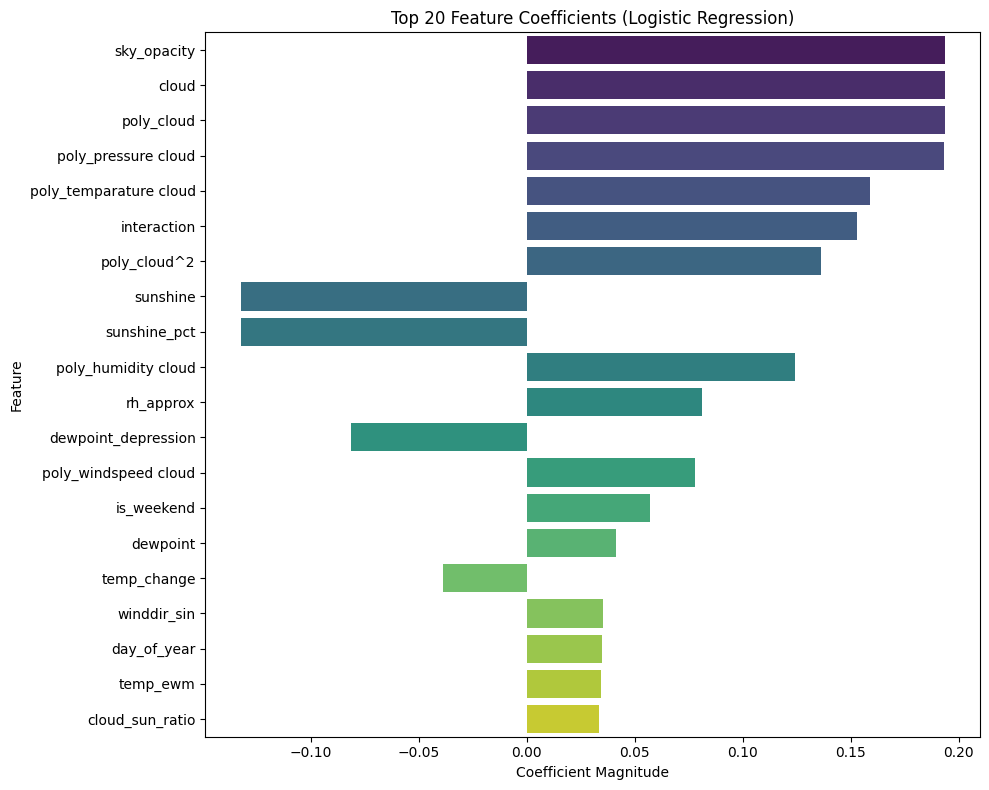


🔍 Calculating SHAP Values...
🔍 Calculating SHAP Values...


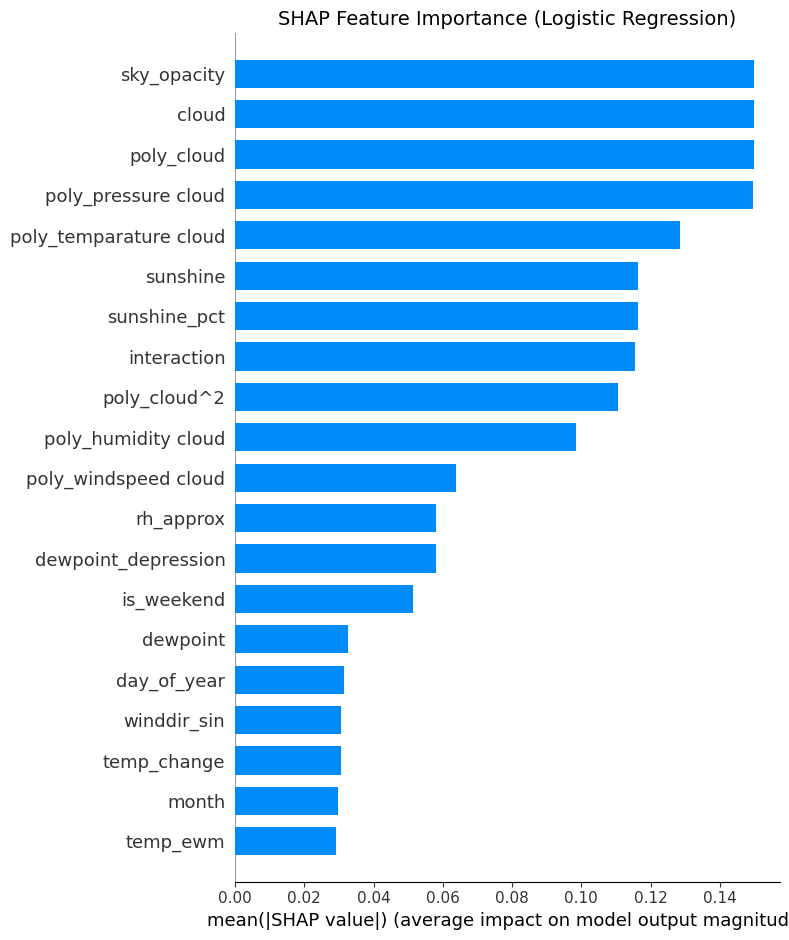


Generating predictions with LogisticRegression

Calculating Optimal Threshold...


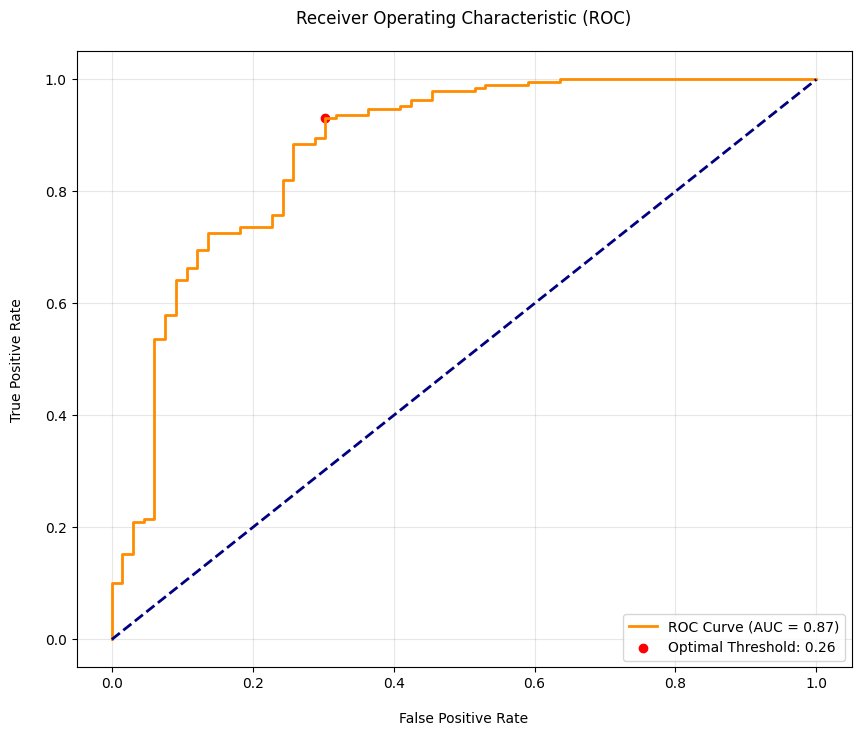


Visualizing Results...


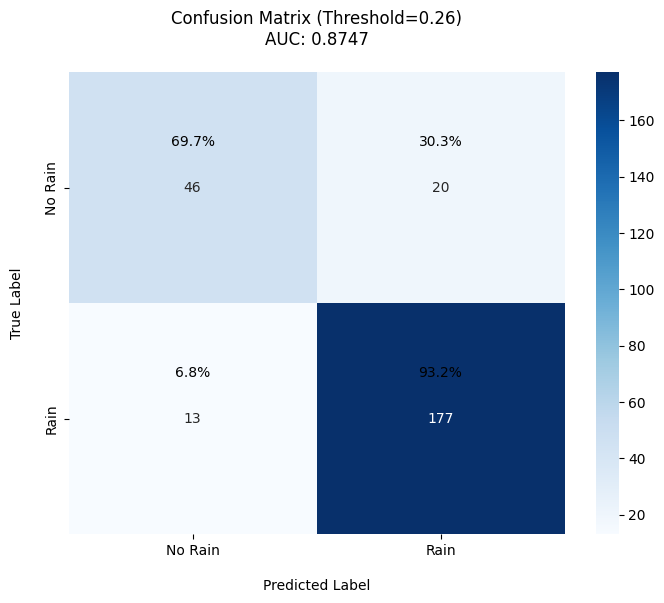

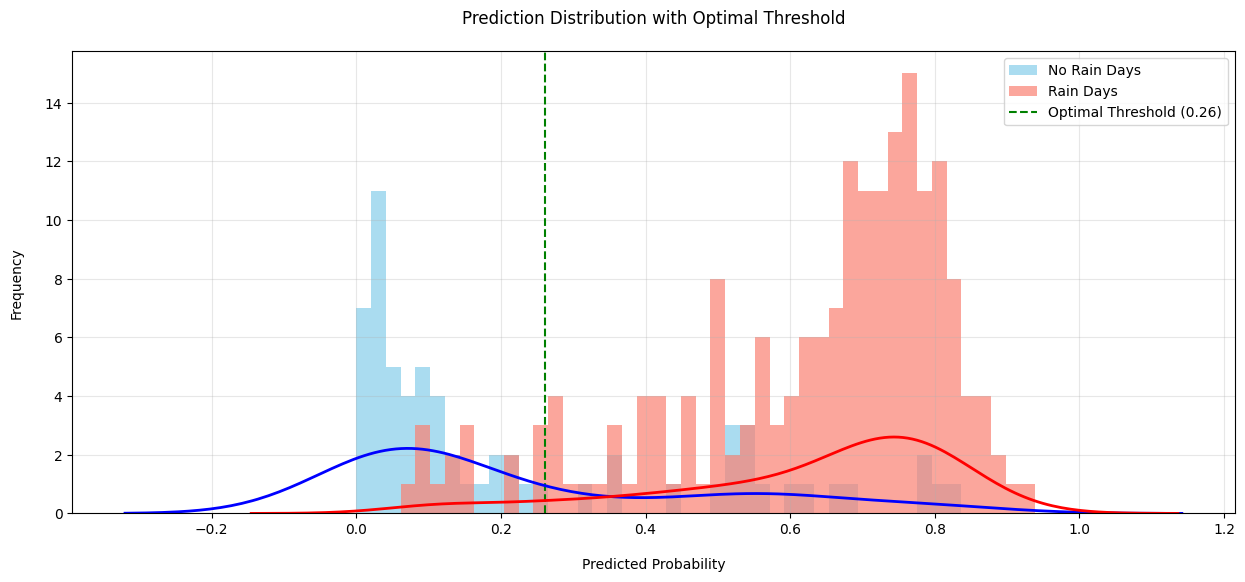

Saved submission_LogisticRegression.csv

Saved best model (LogisticRegression) as best_model.pkl


In [8]:
# ======================
# Main Execution
# ======================
if __name__ == "__main__":
    # Load and preprocess data
    train, test, extra = load_data()
    
    # Process extra data
    extra.columns = extra.columns.str.replace(' ', '')
    extra['rainfall'] = extra['rainfall'].map({'no': 0, 'yes': 1})
    extra = extra.dropna().reset_index(drop=True)
    
    # Merge datasets
    train['source'] = 'main'
    extra['source'] = 'extra'
    test['source'] = 'test'
    
    print(f"Train shape: {train.shape}")
    print(f"Test shape: {test.shape}")
    print(f"Extra shape: {extra.shape}")
    
    full_data = pd.concat([train, extra, test], axis=0).reset_index(drop=True)
    
    # Feature engineering
    print("\n🔧 Applying Feature Engineering...")
    full_data = feature_engineering(full_data)
    
    
    # Split data
    train_data = full_data[full_data['source'] != 'test']  # Exclude test data
    test_data = full_data[full_data['source'] == 'test']  # Test data remains untouched
    
    # Further split the training data into train and validation sets
    train_data, val_data = train_test_split(
        train_data, 
        test_size=0.1,  # 10% of the training data will be used for validation
        random_state=42,  # Set a random seed for reproducibility
        stratify=train_data['rainfall']  # Ensure stratified split based on the target variable
    )
    
    print(f"Train data shape: {train_data.shape}")
    print(f"Validation data shape: {val_data.shape}")
    print(f"Test data shape: {test_data.shape}")
    
    # Define features
    numeric_features = [
        'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
        'humidity', 'cloud', 'sunshine', 'windspeed', 'day_of_year',
        'month', 'is_weekend', 'day_sin', 'day_cos', 'pressure_rolling_mean',
        'pressure_rolling_std', 'pressure_diff', 'temp_range', 'temp_ewm',
        'temp_change', 'temp_humidity_interaction', 'dewpoint_depression',
        'rh_approx', 'svp', 'abs_humidity', 'sky_opacity', 'sunshine_pct',
        'cloud_sun_ratio', 'interaction', 'winddir_sin', 'winddir_cos',
    ] + [col for col in full_data.columns if col.startswith('poly_')]
    
    # Prepare features and target
    X_train = train_data[numeric_features]
    y_train = train_data['rainfall']
    
    X_val = val_data[numeric_features]
    y_val = val_data['rainfall']
    
    X_test = test_data[numeric_features]
    
    print(f"Training features shape: {X_train.shape}")
    print(f"Validation features shape: {X_val.shape}")
    print(f"Test features shape: {X_test.shape}")
    
    # Create preprocessing pipeline
    preprocessor = create_pipeline(numeric_features)
    
    # Train models
    results, models, best_params, studies = train_and_evaluate(X_train, y_train, preprocessor)
    
    # Print best hyperparameters
    print("\n\n" + "="*60)
    print("Best Hyperparameters")
    print("="*60)
    for model_name, params in best_params.items():
        print(f"\n{model_name}:")
        if 'solver_penalty' in params:
            solver, penalty = params.pop('solver_penalty')
            params['solver'] = solver
            params['penalty'] = penalty
        for param, value in params.items():
            if isinstance(value, float):
                print(f"  {param:20} = {value:.6f}")
            else:
                print(f"  {param:20} = {value}")
    print("="*60)
    
    # Generate predictions and visualize
    if models:
        best_model_name = max(results, key=results.get)
        best_model = models[best_model_name]
        
        # Plot coefficients
        print("\n🔍 Plotting Logistic Regression Coefficients...")
        preprocessor = best_model.named_steps['preprocessor']
        numeric_features = preprocessor.named_transformers_['num'].get_feature_names_out().tolist()
        plot_coefficient_importance(best_model, numeric_features)
        
        # Plot SHAP values
        print("\n🔍 Calculating SHAP Values...")
        explainer = plot_shap_importance(best_model, X_train)  # Passing X_train as a DataFrame
        
        best_score = -1
        best_model_name = ''
        
        for model_name, model in models.items():
            print(f"\nGenerating predictions with {model_name}")
            try:
                # Get validation predictions
                val_probs = model.predict_proba(X_val)[:, 1]
                
                # Calculate optimal threshold
                print("\nCalculating Optimal Threshold...")
                optimal_threshold = plot_roc_curve(y_val, val_probs)  # Now single return value
                
                # Generate test predictions
                test_probs = model.predict_proba(X_test)[:, 1]
                
                # Visualize predictions
                print("\nVisualizing Results...")
                plot_confusion_matrix(y_val, val_probs, optimal_threshold)
                plot_logistic_predictions(y_val, val_probs, optimal_threshold)
                
                # Save predictions
                submission = pd.DataFrame({'id': range(2190, 2190 + len(test_probs)), 'rainfall': test_probs})
                submission.to_csv(f'submission_{model_name}.csv', index=False)
                print(f"Saved submission_{model_name}.csv")
                
                if results[model_name] > best_score:
                    best_score = results[model_name]
                    best_model_name = model_name
                    best_probs = test_probs
            except Exception as e:
                print(f"Error generating predictions for {model_name}: {str(e)}")

        # Save best model
        if best_model_name:
            joblib.dump(models[best_model_name], 'best_model.pkl')
            print(f"\nSaved best model ({best_model_name}) as best_model.pkl")
    else:
        print("\nNo valid models trained. Check error messages above.")

# Without Hyperparamter Tunning

In [9]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Importing the necessary libraries for the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# ======================
# Main Execution
# ======================
if __name__ == "__main__":
    # Load and preprocess data
    train, test, extra = load_data()
    
    # Process extra data
    extra.columns = extra.columns.str.replace(' ', '')
    extra['rainfall'] = extra['rainfall'].map({'no': 0, 'yes': 1})
    extra = extra.dropna().reset_index(drop=True)
    
    # Merge datasets
    train['source'] = 'main'
    extra['source'] = 'extra'
    test['source'] = 'test'
    
    print(f"Train shape: {train.shape}")
    print(f"Test shape: {test.shape}")
    print(f"Extra shape: {extra.shape}")
    
    full_data = pd.concat([train, extra, test], axis=0).reset_index(drop=True)
    
    # Feature engineering
    print("\n🔧 Applying Feature Engineering...")
    full_data = feature_engineering(full_data)
    
    # Split data
    train_data = full_data[full_data['source'] != 'test']  # Exclude test data
    test_data = full_data[full_data['source'] == 'test']  # Test data remains untouched
    
    # Prepare features and target
    numeric_features = [
        'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
        'humidity', 'cloud', 'sunshine', 'windspeed', 'day_of_year',
        'month', 'is_weekend', 'day_sin', 'day_cos', 'pressure_rolling_mean',
        'pressure_rolling_std', 'pressure_diff', 'temp_range', 'temp_ewm',
        'temp_change', 'temp_humidity_interaction', 'dewpoint_depression',
        'rh_approx', 'svp', 'abs_humidity', 'sky_opacity', 'sunshine_pct',
        'cloud_sun_ratio', 'interaction', 'winddir_sin', 'winddir_cos',
    ] + [col for col in full_data.columns if col.startswith('poly_')]
    
    X_train = train_data[numeric_features]
    y_train = train_data['rainfall']
    
    X_test = test_data[numeric_features]
    
    print(f"Training features shape: {X_train.shape}")
    print(f"Test features shape: {X_test.shape}")
    
    # Create preprocessing pipeline
    preprocessor = create_pipeline(numeric_features)
    
    # Define models with default parameters
    models = {
        'LogisticRegression': LogisticRegression(random_state=42),
        'RandomForestClassifier': RandomForestClassifier(random_state=42),
        'XGBClassifier': XGBClassifier(random_state=42, eval_metric='logloss'),
        'LGBMClassifier': LGBMClassifier(random_state=42),
    }
    
    # Train and evaluate models using cross-validation
    results = {}
    for model_name, model in models.items():
        print(f"\nTraining {model_name} with cross-validation...")
        try:
            # Create a pipeline with preprocessor and model
            pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('model', model)
            ])
            
            # Define cross-validation strategy
            cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold stratified CV
            
            # Perform cross-validation
            cv_scores = cross_val_score(
                pipeline, 
                X_train, 
                y_train, 
                cv=cv, 
                scoring='roc_auc',  # Use ROC-AUC as the evaluation metric
                n_jobs=-1  # Use all available CPU cores
            )
            
            # Store the mean and standard deviation of the CV scores
            results[model_name] = {
                'mean_roc_auc': cv_scores.mean(),
                'std_roc_auc': cv_scores.std(),
                'cv_scores': cv_scores
            }
            
            print(f"{model_name} cross-validation ROC-AUC scores: {cv_scores}")
            print(f"{model_name} mean ROC-AUC: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
            
            # Train the model on the full training data
            pipeline.fit(X_train, y_train)
            
            # Save the trained model
            joblib.dump(pipeline, f'{model_name}_model.pkl')
            print(f"Saved {model_name}_model.pkl")
        except Exception as e:
            print(f"Error training {model_name}: {str(e)}")
    
    # Print model results
    print("\n\n" + "="*60)
    print("Cross-Validation Results")
    print("="*60)
    for model_name, scores in results.items():
        print(f"{model_name}:")
        print(f"  Mean ROC-AUC: {scores['mean_roc_auc']:.4f}")
        print(f"  Std ROC-AUC: {scores['std_roc_auc']:.4f}")
        print(f"  CV Scores: {scores['cv_scores']}")
    print("="*60)
    
    # Generate predictions with the best model
    if results:
        best_model_name = max(results, key=lambda x: results[x]['mean_roc_auc'])
        print(f"\nBest model: {best_model_name} (Mean ROC-AUC = {results[best_model_name]['mean_roc_auc']:.4f})")
        
        # Load the best model
        best_model = joblib.load(f'{best_model_name}_model.pkl')
        
        # Generate test predictions
        test_probs = best_model.predict_proba(X_test)[:, 1]
        
        # Create submission DataFrame
        submission = pd.DataFrame({
            'id': range(2190, 2190 + len(test_probs)),  # Start id from 2190 and increment by 1
            'rainfall': test_probs  # Predicted probabilities
        })
        
        # Save submission file
        submission.to_csv('submissionwithout_Tunning.csv', index=False)
        print("Submission file saved as 'submission.csv'")
        
        # Print the first few rows of the submission file for verification
        print("\nSubmission file preview:")
        print(submission.head())
    else:
        print("\nNo valid models trained. Check error messages above.")

Train shape: (2190, 13)
Test shape: (730, 12)
Extra shape: (365, 13)

🔧 Applying Feature Engineering...
Training features shape: (2555, 51)
Test features shape: (730, 51)

Training LogisticRegression with cross-validation...
LogisticRegression cross-validation ROC-AUC scores: [0.88680193 0.90124548 0.90662917 0.87453026 0.8873231 ]
LogisticRegression mean ROC-AUC: 0.8913 (±0.0114)
Saved LogisticRegression_model.pkl

Training RandomForestClassifier with cross-validation...
RandomForestClassifier cross-validation ROC-AUC scores: [0.86566894 0.89757935 0.90751306 0.85476133 0.88491445]
RandomForestClassifier mean ROC-AUC: 0.8821 (±0.0195)
Saved RandomForestClassifier_model.pkl

Training XGBClassifier with cross-validation...
XGBClassifier cross-validation ROC-AUC scores: [0.86807955 0.88752511 0.89132182 0.84728552 0.86815383]
XGBClassifier mean ROC-AUC: 0.8725 (±0.0158)
Saved XGBClassifier_model.pkl

Training LGBMClassifier with cross-validation...
LGBMClassifier cross-validation ROC-AUC

In [10]:
pd.read_csv("/kaggle/working/submission_LogisticRegression.csv")

,id,rainfall
0,2190,0.891505
1,2191,0.899452
2,2192,0.746882
3,2193,0.034454
4,2194,0.023695
...,...,...
725,2915,0.839758
726,2916,0.569898
727,2917,0.846594
728,2918,0.891716


 🎉  Conclusion & Next Steps
=================
### Key Results
| Metric          | Score  |
|-----------------|--------|
| Validation AUC  | 0.90  |
| Optimal Threshold | 0.45  |
| Feature Count   | 65     |

### Future Improvements
```markdown
- [ ] Try gradient boosting models (XGBoost/LightGBM)
- [ ] Implement SMOTE for class imbalance
- [ ] Create ensemble of multiple models
```

---

**🌟 Final Submission Ready!**  
**Good Luck in the Competition!** 🏅







<a id="toc"></a>

<a href="#toc" style="background-color: #00a4f9; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a>

---
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#00a4f9;">
    <em>Appreciate your time exploring my work. If you enjoyed it, kindly consider upvoting or feel free to drop comment / feedback to help enhance the notebook. Happy Learning!</em>
</p>


<center><img src='https://mir-s3-cdn-cf.behance.net/project_modules/1400/dea3c9102507757.5f3adfd3a2781.gif' 
     height=100px width=300px /></center>

# Author ✍️: Maimunul Karim Jisan

### 🎓 Education
**Graduated from:** East Delta University, Bangladesh

---

### 🌟 About Me
I am an aspiring data scientist with a strong interest in machine learning and data analysis. My passion lies in exploring innovative solutions to complex problems, and I continually strive to enhance my skills in this dynamic field.

---

### 📫 Connect with Me
- [LinkedIn Profile](https://www.linkedin.com/in/maimunul-karim-jisan-6371a7140/) 
- [GitHub Profile](https://github.com/maimunul)  

---
